# Linear Algebra II: Matrix Operations

This topic, *Linear Algebra II: Matrix Operations*, builds on the basics of linear algebra. It is essential because these intermediate-level manipulations of tensors lie at the heart of most machine learning approaches and are especially predominant in deep learning. 

Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces as well as to reduce the dimensionality of complex spaces. The content covered in this topic is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*. 

## Segment 1: Review of Introductory Linear Algebra

In [125]:
import numpy as np

In [126]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [127]:
x.shape

(3,)

In [128]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [129]:
x.shape

(1, 3)

In [130]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [131]:
x.T.shape

(3, 1)

## $L^2$ Norm

In [132]:
x

array([[25,  2,  5]])

In [133]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [134]:
np.linalg.norm(x)

25.573423705088842

### Matrices

In [135]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [136]:
X.shape

(3, 2)

### Matrix Transposition

In [137]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [138]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

### Matrix Multiplication

In [139]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [140]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

Using the multiplication operator on two tensors of the same size in Numpy or TensorFlow applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**: 

In [141]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [142]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [143]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

Matrix multiplication with a vector: 

In [144]:
b = np.array([1, 2])
b

array([1, 2])

In [145]:
np.dot(A, b)

array([11, 17, 23])

Matrix multiplication with two matrices:

In [146]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [147]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

### Matrix Inversion

In [148]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [149]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [150]:
y= np.array([4, -7])
y

array([ 4, -7])

In [151]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [152]:
np.dot(X, w)

array([ 4., -7.])

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [153]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [154]:
import matplotlib.pyplot as plt

In [155]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

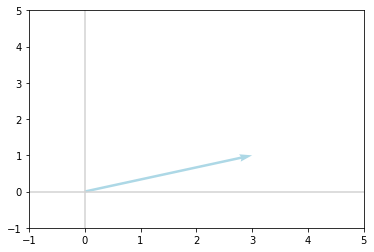

In [156]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [157]:
I = np.array([[1, 0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [158]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [159]:
v == Iv

array([ True,  True])

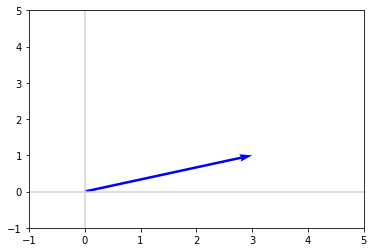

In [160]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1,5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [161]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [162]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

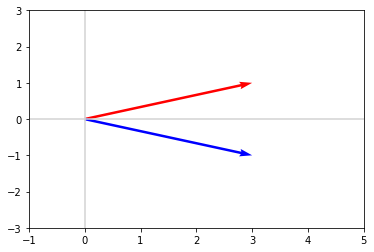

In [163]:
plot_vectors([v, Ev], ['red', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [164]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [165]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

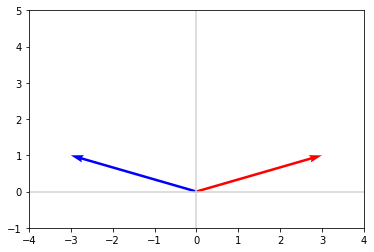

In [166]:
plot_vectors([v, Fv], ['red', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 

In [167]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [168]:
Av = np.dot(A, v)
Av

array([1, 4])

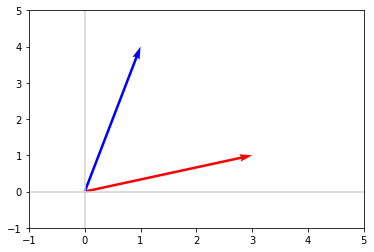

In [169]:
plot_vectors([v, Av], ['red', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

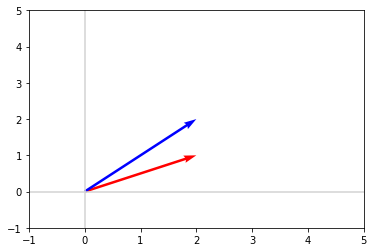

In [170]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ["red", "blue"])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [171]:
v

array([3, 1])

In [172]:
np.matrix(v).T

matrix([[3],
        [1]])

In [173]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [174]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)

v

array([3, 1])

In [175]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [176]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [177]:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:, clmn]).reshape(-1)

In [178]:
vectorfy(V, 0)

array([3, 1])

In [179]:
vectorfy(V, 0) == v

array([ True,  True])

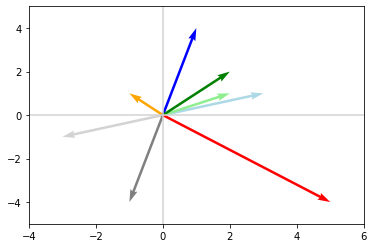

In [180]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues...

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [181]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [182]:
lambdas, V = np.linalg.eig(A) 

The matrix contains as many eigenvectors as there are columns of A: 

In [183]:
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [184]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [185]:
v = V[:, 0]
v

array([0.86011126, 0.51010647])

In [186]:
lambduh = lambdas[0]
lambduh

1.3722813232690143

In [187]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [188]:
lambduh * v

array([1.18031462, 0.70000958])

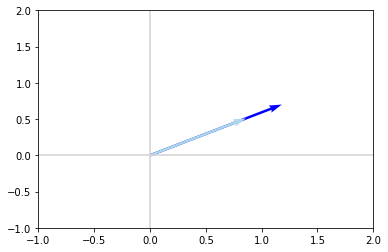

In [190]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)